 # Gastric Cancer Prediction
 
Explore into the exploration and preparation of a dataset focused on gastric cancer prediction. By importing essential libraries and analyzing the dataset, we begin by performing an in-depth exploratory data analysis (EDA) to understand the structure and characteristics of the data. The dataset comprises various microRNA-target interaction predictions, which are crucial for understanding gene regulation mechanisms related to gastric cancer.

The notebook includes steps to clean and preprocess the data, handling missing values, and categorizing features into different types—categorical, non-categorical, discrete, and continuous. These steps lay the groundwork for developing robust machine learning models to predict and understand gastric cancer outcomes based on microRNA interactions.
 
 ## Import Libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer

- Suppress Warnings

In [2]:
warnings.filterwarnings("ignore")

- Set `seaborn` plot style

In [3]:
sns.set(style="whitegrid")

## Exploratory Data Analysis

Dataset URL: "https://raw.githubusercontent.com/cogxen/datasets/main/gastric-cancer/gastric-cancer.xlsx"

- Load the dataset
- Assign the dataset to a variable
- Set plot style (seaborn)

In [4]:
dataset_url = "https://raw.githubusercontent.com/cogxen/datasets/main/gastric-cancer/gastric-cancer.xlsx"

# Assign the dataset
gastric_cancer = pd.read_excel(dataset_url)

- Display the first five (5) rows of the DataFrame

In [5]:
gastric_cancer.head()

,Unnamed: 0,mature_mirna_acc,mature_mirna_id,target_symbol,target_entrez,target_ensembl,diana_microt,elmmo,microcosm,miranda,mirdb,pictar,pita,targetscan,predicted.sum,all.sum
0,1,MIMAT0002820,hsa-miR-497-5p,SEMA6D,80031.0,ENSG00000137872,1,4,1,2,1,1,1,1,8,8
1,2,MIMAT0002820,hsa-miR-497-5p,AK4,205.0,ENSG00000162433,1,2,0,1,1,1,1,1,7,7
2,3,MIMAT0002820,hsa-miR-497-5p,CCNE1,898.0,ENSG00000105173,2,4,0,2,2,1,2,2,7,7
3,4,MIMAT0002820,hsa-miR-497-5p,CD2AP,23607.0,ENSG00000198087,1,2,0,1,1,1,1,1,7,7
4,5,MIMAT0002820,hsa-miR-497-5p,CDK17,5128.0,ENSG00000059758,2,2,0,1,2,1,1,1,7,7


- Display the last five (5) rows of the DataFrame

In [6]:
gastric_cancer.tail()

,Unnamed: 0,mature_mirna_acc,mature_mirna_id,target_symbol,target_entrez,target_ensembl,diana_microt,elmmo,microcosm,miranda,mirdb,pictar,pita,targetscan,predicted.sum,all.sum
3706,3707,MIMAT0002820,hsa-miR-497-5p,ZP1,22917.0,ENSG00000149506,1,0,0,0,0,0,0,0,1,1
3707,3708,MIMAT0002820,hsa-miR-497-5p,ZP3,7784.0,ENSG00000188372,0,0,1,0,0,0,0,0,1,1
3708,3709,MIMAT0002820,hsa-miR-497-5p,ZPBP2,124626.0,ENSG00000186075,0,0,1,0,0,0,0,0,1,1
3709,3710,MIMAT0002820,hsa-miR-497-5p,ZRANB1,54764.0,ENSG00000019995,2,0,0,0,0,0,0,0,1,1
3710,3711,MIMAT0002820,hsa-miR-497-5p,ZSWIM5,57643.0,ENSG00000162415,0,0,0,0,0,0,1,0,1,1


- Display the current shape of the dataset

In [7]:
gastric_cancer.shape

(3711, 16)

- Drop the `Unnamed: 0` column

In [8]:
gastric_cancer = gastric_cancer.drop("Unnamed: 0", axis=1)

- Display the new shape of the dataset

In [9]:
gastric_cancer.shape

(3711, 15)

As we can see, we already drop the `Unnamed: 0` column. Why do we need to remove that? It duplicates the row index, which is implicitly present in a DataFrame and it's clear that this column doesn't contain any relevant information about the data it is simple sequential index, so removing it is a good practice. 

- Preview all the columns

In [10]:
gastric_cancer.columns

Index(['mature_mirna_acc', 'mature_mirna_id', 'target_symbol', 'target_entrez',
       'target_ensembl', 'diana_microt', 'elmmo', 'microcosm', 'miranda',
       'mirdb', 'pictar', 'pita', 'targetscan', 'predicted.sum', 'all.sum'],
      dtype='object')

Based on the common terminology used in bioinformatics and miRNA research, here are more informative descriptions for your dataset columns. 

**Core Information**

1. `mature_mirna_acc` - Mature microRNA accession number (a unique identifier assigned to a mature miRNA sequence)
2. `mature_mirna_id` -  Mature microRNA ID (a standardized identifier for a mature miRNA)
3. `target_symbol` - Gene symbol of the predicted target gene for the miRNA
4. `target_entrez` - Entrez Gene ID of the predicted target gene
5. `target_ensembl` - Ensembl ID of the predicted target gene

**Prediction Scores**

6. `diana_microt` - Predicted interaction confidence score from Diana-microT
7. `elmmo` - Predicted interaction confidence score from elMMo
8. `microcosm` - Predicted interaction confidence score from MicroCosm
9. `miranda` - Predicted interaction confidence score from miRanda
10. `mirdb` - Predicted interaction confidence score from miRDB 
11. `pictar` - Predicted interaction confidence score from PicTar
12. `pita` - Predicted interaction confidence score from PITA
13. `targetscan` - Predicted interaction confidence score from TargetScan

**Summary Metrics**

14. `predicted.sum` - Cumulative predicted interaction confidence score
15. `all.sum` - Total number of prediction tools indicating a potential miRNA-target interaction

NOTE: The terms "confidence score" and "interaction" are used to provide a more precise description of the data.

**Biological Context**

**HER2** is a proto-oncogene frequently overexpressed in gastric adenocarcinoma, contributing significantly to tumorigenesis and progression.

The dataset encompasses a compendium of computational predictions for **microRNA-target interactions**, providing a foundation for elucidating post-transcriptional gene regulatory mechanisms implicated in gastric cancer pathogenesis.

- Preview the summation of null values per column

In [11]:
gastric_cancer.isnull().sum()

mature_mirna_acc     0
mature_mirna_id      0
target_symbol       51
target_entrez       76
target_ensembl      32
diana_microt         0
elmmo                0
microcosm            0
miranda              0
mirdb                0
pictar               0
pita                 0
targetscan           0
predicted.sum        0
all.sum              0
dtype: int64

Significant missingness is observed in target-related columns (`target_symbol`, `target_entrez`, `target_ensembl`), indicating potential data incompleteness or inconsistencies in target gene annotation.

- Calculate the count of duplicate records in the DataFrame

In [12]:
gastric_cancer.duplicated().sum()

0

- Preview the statistical summary/descriptive statistics of the DataFrame

In [13]:
gastric_cancer.describe()

,target_entrez,diana_microt,elmmo,microcosm,miranda,mirdb,pictar,pita,targetscan,predicted.sum,all.sum
count,3.635000e+03,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000
mean,1.926985e+06,0.723525,1.276206,0.111291,0.283212,0.142819,0.106979,0.270547,0.120183,1.877661,1.877661
std,1.353750e+07,0.760964,1.479773,0.379756,1.158973,0.414139,0.328572,0.543615,0.339016,1.312233,1.312233
min,1.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,6.785500e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2.592800e+04,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,8.390050e+04,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
max,1.027244e+08,4.000000,14.000000,4.000000,22.000000,4.000000,3.000000,5.000000,3.000000,8.000000,8.000000


The descriptive statistics provide a preliminary understanding of the dataset's numerical attributes, particularly focusing on central tendencies and dispersion.

- Provide a summary of the DataFrame's structure and data types

In [14]:
gastric_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3711 entries, 0 to 3710
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mature_mirna_acc  3711 non-null   object 
 1   mature_mirna_id   3711 non-null   object 
 2   target_symbol     3660 non-null   object 
 3   target_entrez     3635 non-null   float64
 4   target_ensembl    3679 non-null   object 
 5   diana_microt      3711 non-null   int64  
 6   elmmo             3711 non-null   int64  
 7   microcosm         3711 non-null   int64  
 8   miranda           3711 non-null   int64  
 9   mirdb             3711 non-null   int64  
 10  pictar            3711 non-null   int64  
 11  pita              3711 non-null   int64  
 12  targetscan        3711 non-null   int64  
 13  predicted.sum     3711 non-null   int64  
 14  all.sum           3711 non-null   int64  
dtypes: float64(1), int64(10), object(4)
memory usage: 435.0+ KB


- Preview count on unique values in each column of the DataFrame

In [15]:
gastric_cancer.nunique()

mature_mirna_acc       1
mature_mirna_id        1
target_symbol       3497
target_entrez       3530
target_ensembl      3541
diana_microt           4
elmmo                  7
microcosm              5
miranda                8
mirdb                  5
pictar                 4
pita                   6
targetscan             4
predicted.sum          8
all.sum                8
dtype: int64

### Impute Missing Values

As we observed in the dataset, significant missing values exist within columns associated with target genes, specifically `target_symbol`, `target_entrez`, and `target_ensembl`. This data incompleteness could potentially introduce bias and hinder the effectiveness of subsequent analyses. To mitigate these issues and enhance data integrity, we implemented imputation techniques. For categorical columns (`target_symbol` and `target_ensembl`), where missing values likely represent unannotated gene information, we employed mode imputation to maintain data consistency. Conversely, for the numerical `target_entrez` column, we utilized median imputation to address missing values and reduce the impact of potential outliers. By applying these imputation strategies, we aimed to create a more complete and reliable dataset for subsequent modeling and analysis.

- Impute missing values
    - Perform data imputation to handle missing values in the specified columns
    - Mode imputation for categorical columns
    - Median imputation for numerical columns

*This is a common preprocessing step in data analysis to ensure data completeness before further modeling or analysis.*



In [16]:
# Initialize the imputer
median_imp = SimpleImputer(strategy="median")

# List of categorical columns
categorical_cols = ["target_symbol", "target_ensembl"]

# Impute missing values in categorical columns with the mode
for col in categorical_cols:
    mode_value = gastric_cancer[col].mode()[0]
    gastric_cancer[col].fillna(mode_value, inplace=True)

# Impute missing values in the numerical column with the median
gastric_cancer[['target_entrez']] = median_imp.fit_transform(gastric_cancer[['target_entrez']])

- Preview the impact of imputation by examining the count of values in each column in the processed DataFrame

In [17]:
gastric_cancer.isnull().sum()

mature_mirna_acc    0
mature_mirna_id     0
target_symbol       0
target_entrez       0
target_ensembl      0
diana_microt        0
elmmo               0
microcosm           0
miranda             0
mirdb               0
pictar              0
pita                0
targetscan          0
predicted.sum       0
all.sum             0
dtype: int64

The post-imputation analysis indicates a successful resolution of missing value issues within the dataset. The absence of null values across all columns confirms the efficacy of the imputation strategies employed. This outcome is crucial as it ensures data integrity and lays a solid foundation for subsequent analytical endeavors.

### Understanding Feature Types

This is crucial for choosing appropriate analysis and modeling techniques. Categorical features might require encoding before feeding them into models, discrete features might benefit from specific visualization techniques like count plots, and continuous features might be suitable for techniques that analyze trends and distribution.


- Separate the DataFrame into two categories based on their data types
    - `object`
    - `numerical`

In [18]:
for dtype, name in zip([object, np.number], ["Object type columns", "Numerical type columns"]):
    cols = gastric_cancer.select_dtypes(include=dtype).columns
    print(f"{name}:\n{cols}\n")

Object type columns:
Index(['mature_mirna_acc', 'mature_mirna_id', 'target_symbol',
       'target_ensembl'],
      dtype='object')

Numerical type columns:
Index(['target_entrez', 'diana_microt', 'elmmo', 'microcosm', 'miranda',
       'mirdb', 'pictar', 'pita', 'targetscan', 'predicted.sum', 'all.sum'],
      dtype='object')



**Why classify features?**

Feature classification is a fundamental step in data preprocessing and exploratory data analysis (EDA). It provides essential insights into the nature of your data.

- Feature classification
    - Categorical features - nominal or ordinal attributes representing distinct groups or categories
    - Numerical features - quantitative attributes measured on a continuous or discrete scale
        - Discretes - numerical data with a finite set of distinct values, often representing counts or frequencies
        - Continuous - numerical data with an infinite set of possible values within a given range, representing measurements or quantities


By categorizing features based on these criteria, we can effectively prepare and analyze data for subsequent modeling tasks.

In [19]:
# Define feature classification function
def feature_classification(data):
    categorical = [col for col in data.columns if data[col].dtype == "object" and data[col].nunique() < 20]
    non_categorical = [col for col in data.columns if data[col].dtype == "object" and data[col].nunique() >= 20]
    discrete = [col for col in data.columns if data[col].dtype in ["int64", "float64"] and data[col].nunique() < 10]
    continuous = [col for col in data.columns if data[col].dtype in ["int64", "float64"] and data[col].nunique() >= 10]
    
    return categorical, non_categorical, discrete, continuous

- Apply the feature classification function, `feature_classification`
- Preview the feature results
    - Categorical
    - Non-categorical
    - Discrete
    - Continuous 

In [20]:
# Apply the feature_classification
categorical, non_categorical, discrete, continuous = feature_classification(gastric_cancer)

feature_types = {
    "Categorical features": categorical,
    "Non-categorical features": non_categorical,
    "Discrete features": discrete,
    "Continuous features": continuous
}

# Preview results
for feature_type, features in feature_types.items():
    print(f"{feature_type}: {features}\n")

Categorical features: ['mature_mirna_acc', 'mature_mirna_id']

Non-categorical features: ['target_symbol', 'target_ensembl']

Discrete features: ['diana_microt', 'elmmo', 'microcosm', 'miranda', 'mirdb', 'pictar', 'pita', 'targetscan', 'predicted.sum', 'all.sum']

Continuous features: ['target_entrez']



### Visualizations

To gain a holistic understanding of the dataset, a comprehensive visualization strategy encompassing all feature types is essential. While the preceding section focused on discrete features, a broader approach is necessary to uncover underlying patterns and relationships.

#### Discrete Variables

Visualizing discrete variables in the data analysis process is crucial because it helps you quickly understand the distribution of categorical data. 

1. Discrete variables, while represented numerically, often behave categorically as they take on a limited set of distinct values. To effectively explore their distribution and identify potential patterns, count plots are employed.
2. By visualizing these features, insights into data composition, potential class imbalances, and feature relationships can be uncovered, informing subsequent analysis and modeling decisions.

So now, 
- Generate countplots for each discrete variables
- Display the frequency of each category
    - Analyze the distributions - examine the resulting plots to assess the frequency of occurrence for each distinct value
    - Identify patterns - look for any imbalances, outliers, or unexpected value combinations that might warrant further investigation

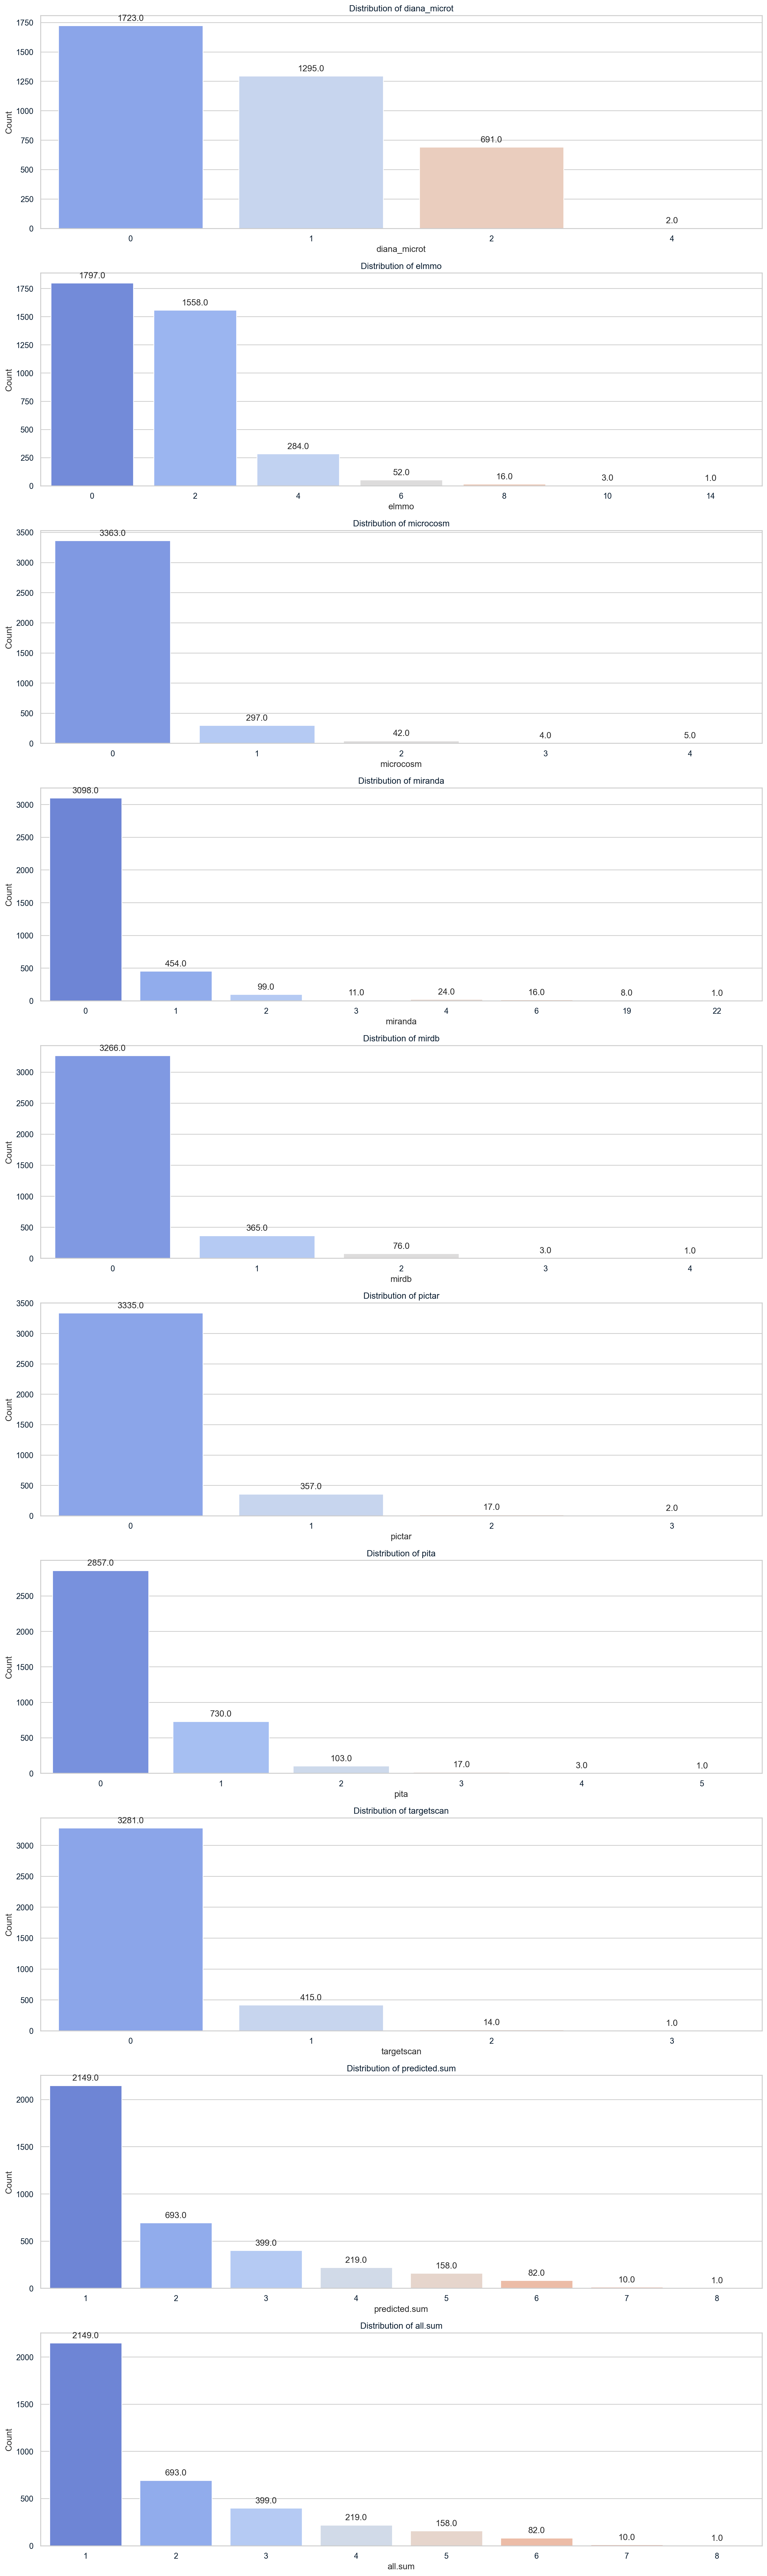

In [21]:
fig, axes = plt.subplots(len(discrete), 1, figsize=(15, len(discrete)*5))
for i, ax in zip(discrete, axes.flatten()):
    sns.countplot(x=i, data=gastric_cancer, palette='coolwarm', ax=ax)  # Changed palette to 'coolwarm'
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10), textcoords='offset points',
                    ha='center', va='center')
    ax.set_title(f'Distribution of {i}')
    ax.set_xlabel(i)
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

By systematically analyzing these discrete features, a deeper understanding of the dataset can be achieved, informing subsequent modeling and decision-making processes.

#### Continuous Variables

